In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
from process import *
df = load_data(DatasetDirectory.PENGUINS)

In [3]:
data_preprocessing(df, DatasetDirectory.PENGUINS)

In [4]:
X = df.drop('species', axis=1)
y = df['species']

print(f"Dataset shape: {X.shape}, Label distribution:\n{y.value_counts()}")

Dataset shape: (333, 9), Label distribution:
species
0    146
2    119
1     68
Name: count, dtype: int64


In [5]:
le_species = LabelEncoder()
y = le_species.fit_transform(y)

In [6]:
X.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex  year  \
0            39.1           18.7              181.0       3750.0    1  2007   
1            39.5           17.4              186.0       3800.0    0  2007   
2            40.3           18.0              195.0       3250.0    0  2007   
4            36.7           19.3              193.0       3450.0    0  2007   
5            39.3           20.6              190.0       3650.0    1  2007   

   island_Biscoe  island_Dream  island_Torgersen  
0          False         False              True  
1          False         False              True  
2          False         False              True  
4          False         False              True  
5          False         False              True

In [7]:
X.dtypes

bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
year                   int64
island_Biscoe           bool
island_Dream            bool
island_Torgersen        bool
dtype: object

In [11]:
subsets = []
split_ratios = [0.4, 0.6, 0.8, 0.9] 

In [20]:
for ratio in split_ratios:
    X_train, y_train, X_test, y_test = prepare_dataset_v2(df, ratio, 1-ratio, DatasetDirectory.PENGUINS)
    subsets.append((X_train, y_train, X_test, y_test))

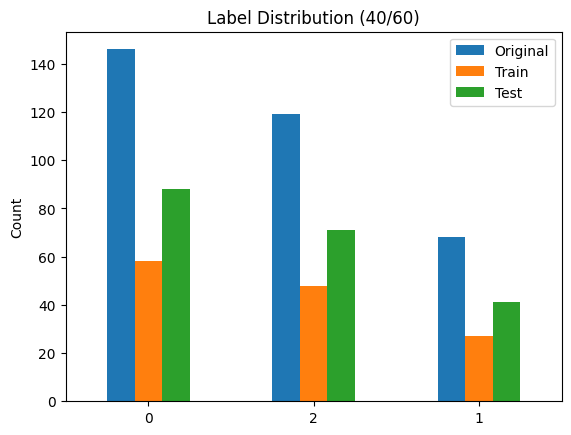

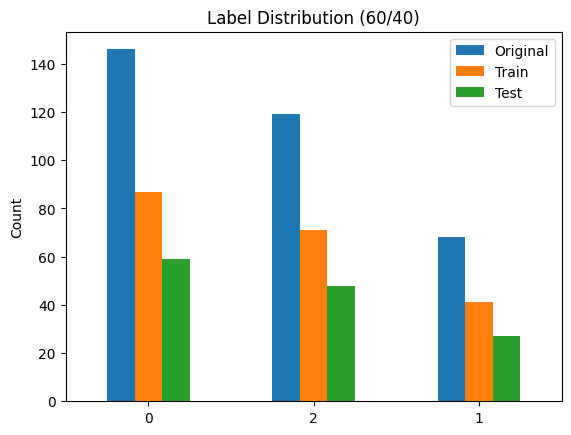

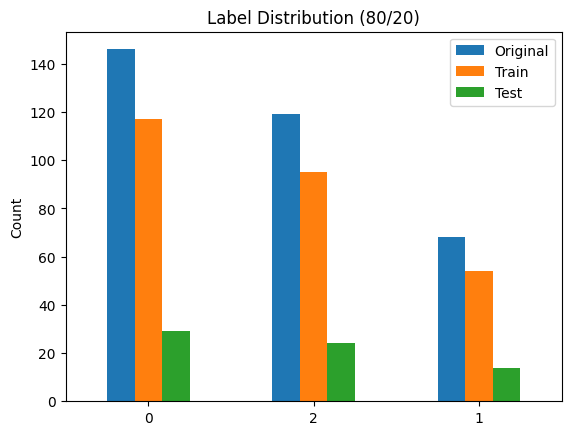

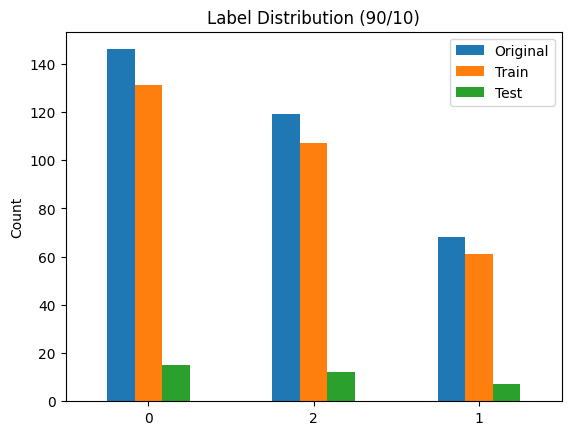

In [13]:
def plot_label_distribution(y_original, y_train, y_test, title):
    counts = pd.DataFrame({
        'Original': pd.Series(y_original).value_counts(),
        'Train': pd.Series(y_train).value_counts(),
        'Test': pd.Series(y_test).value_counts()
    })
    counts.plot(kind='bar', rot=0)
    plt.title(title)
    plt.ylabel('Count')
    plt.show()

for idx, (X_train, y_train, X_test, y_test) in enumerate(subsets):
    title = f"Label Distribution ({int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)})"
    plot_label_distribution(y, y_train, y_test, title)

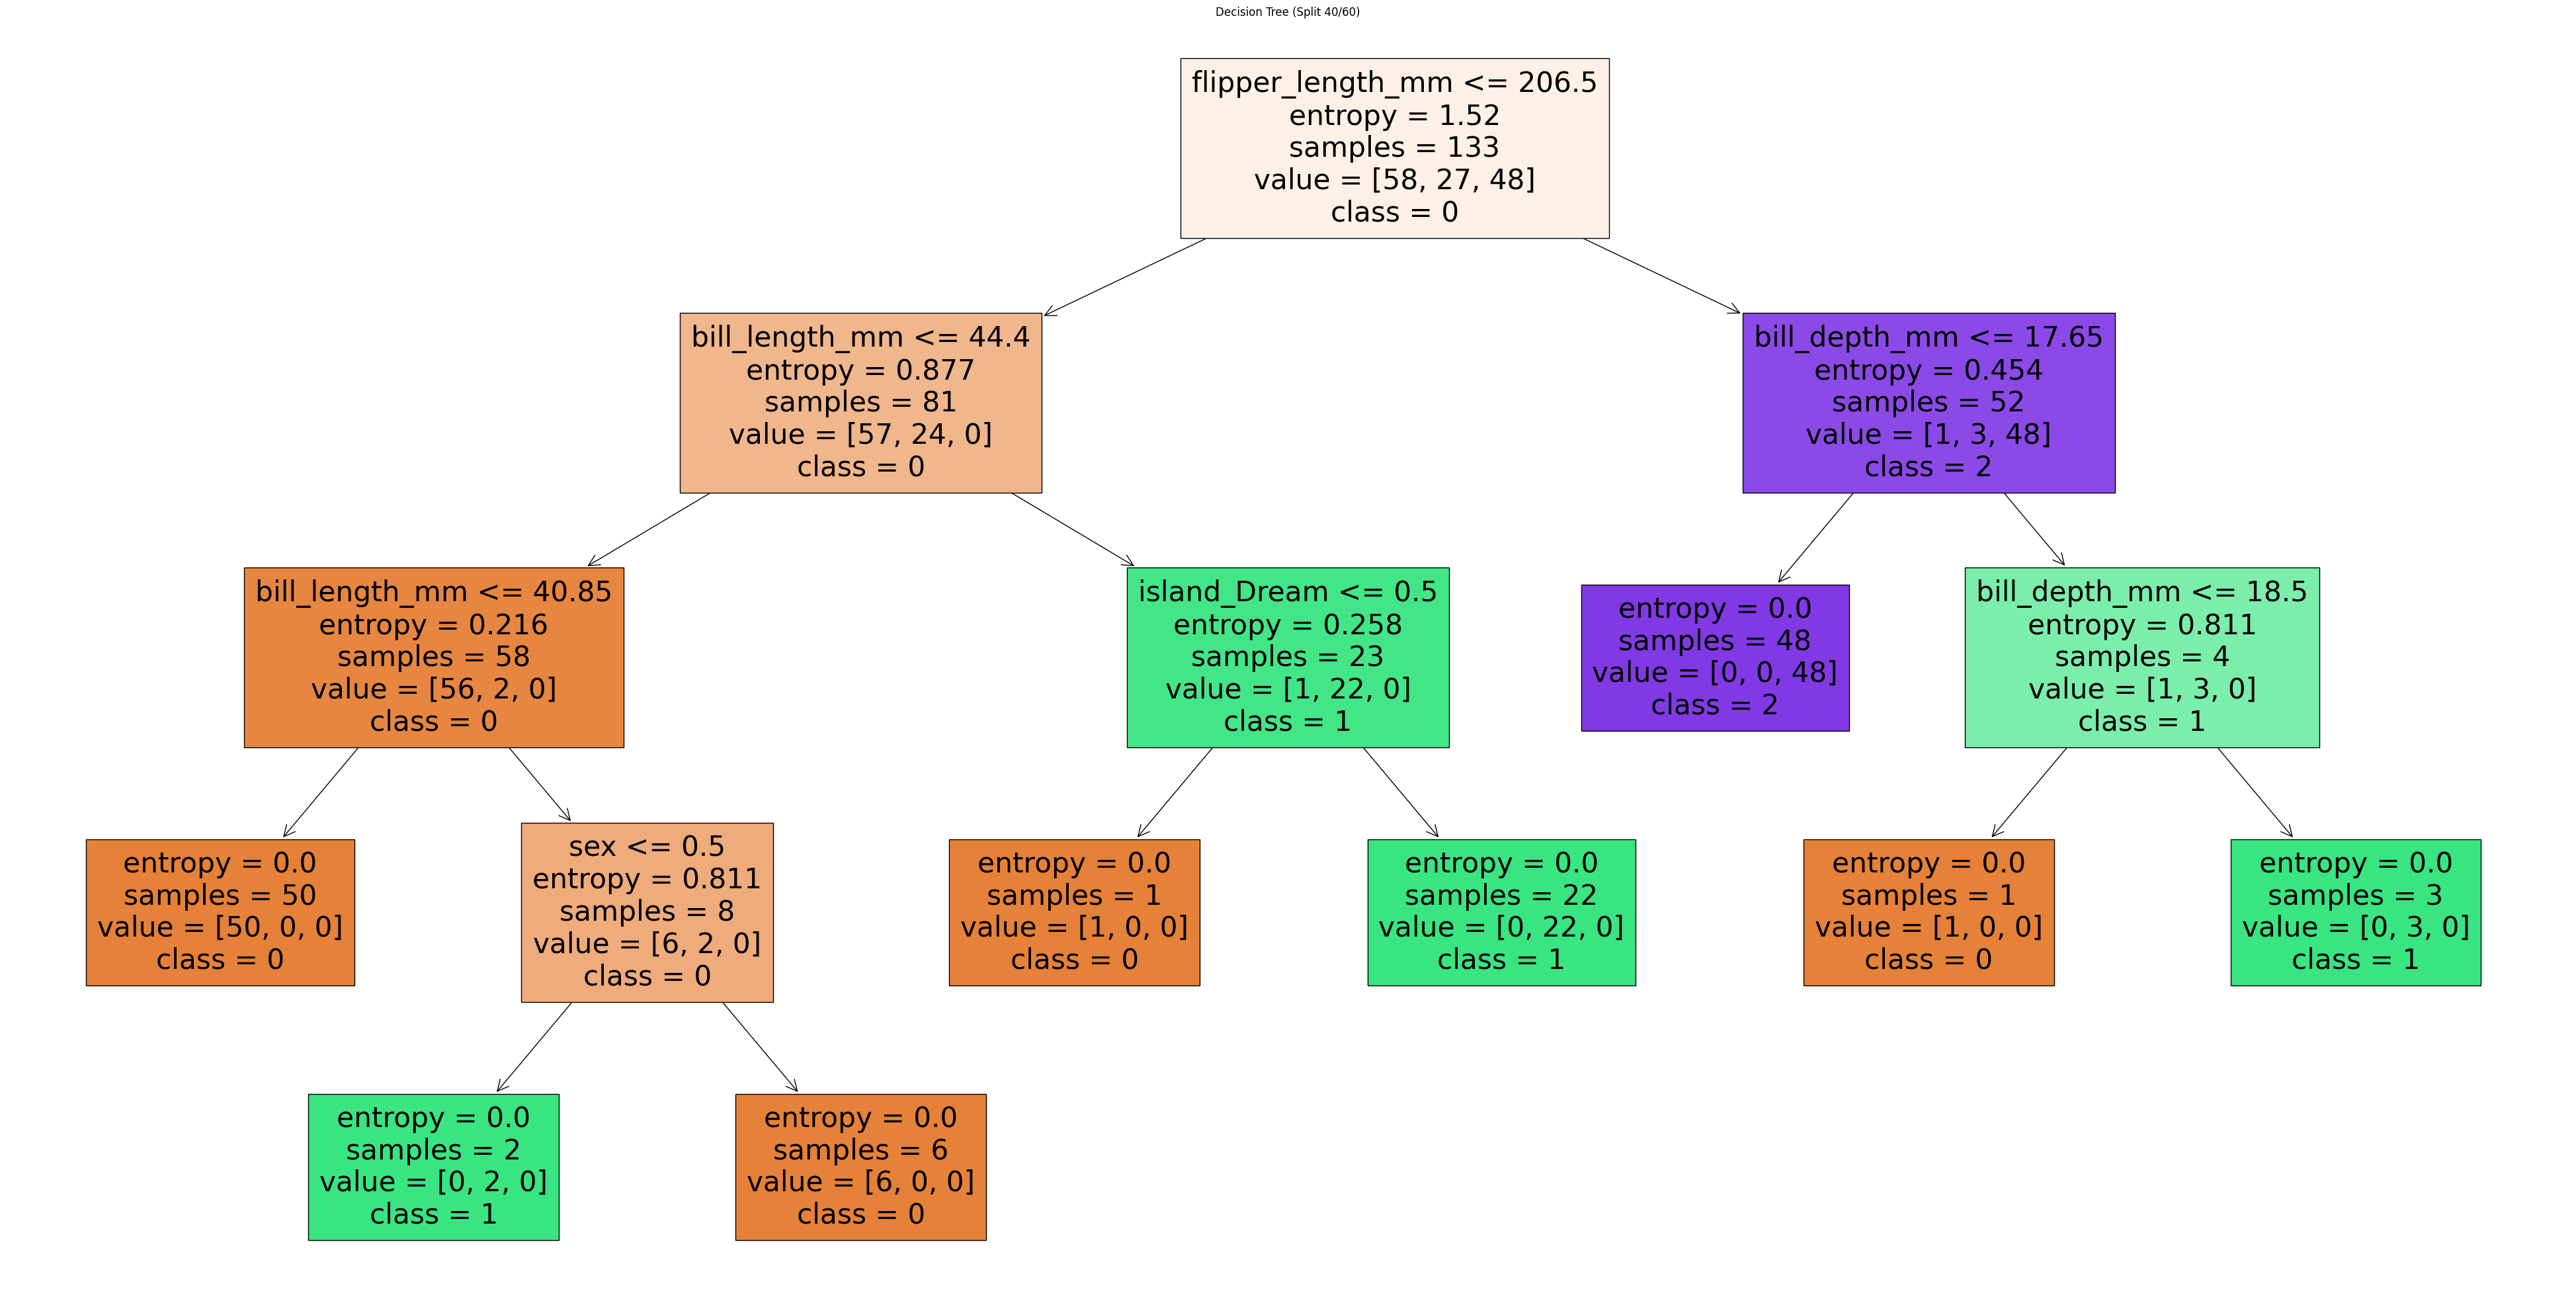

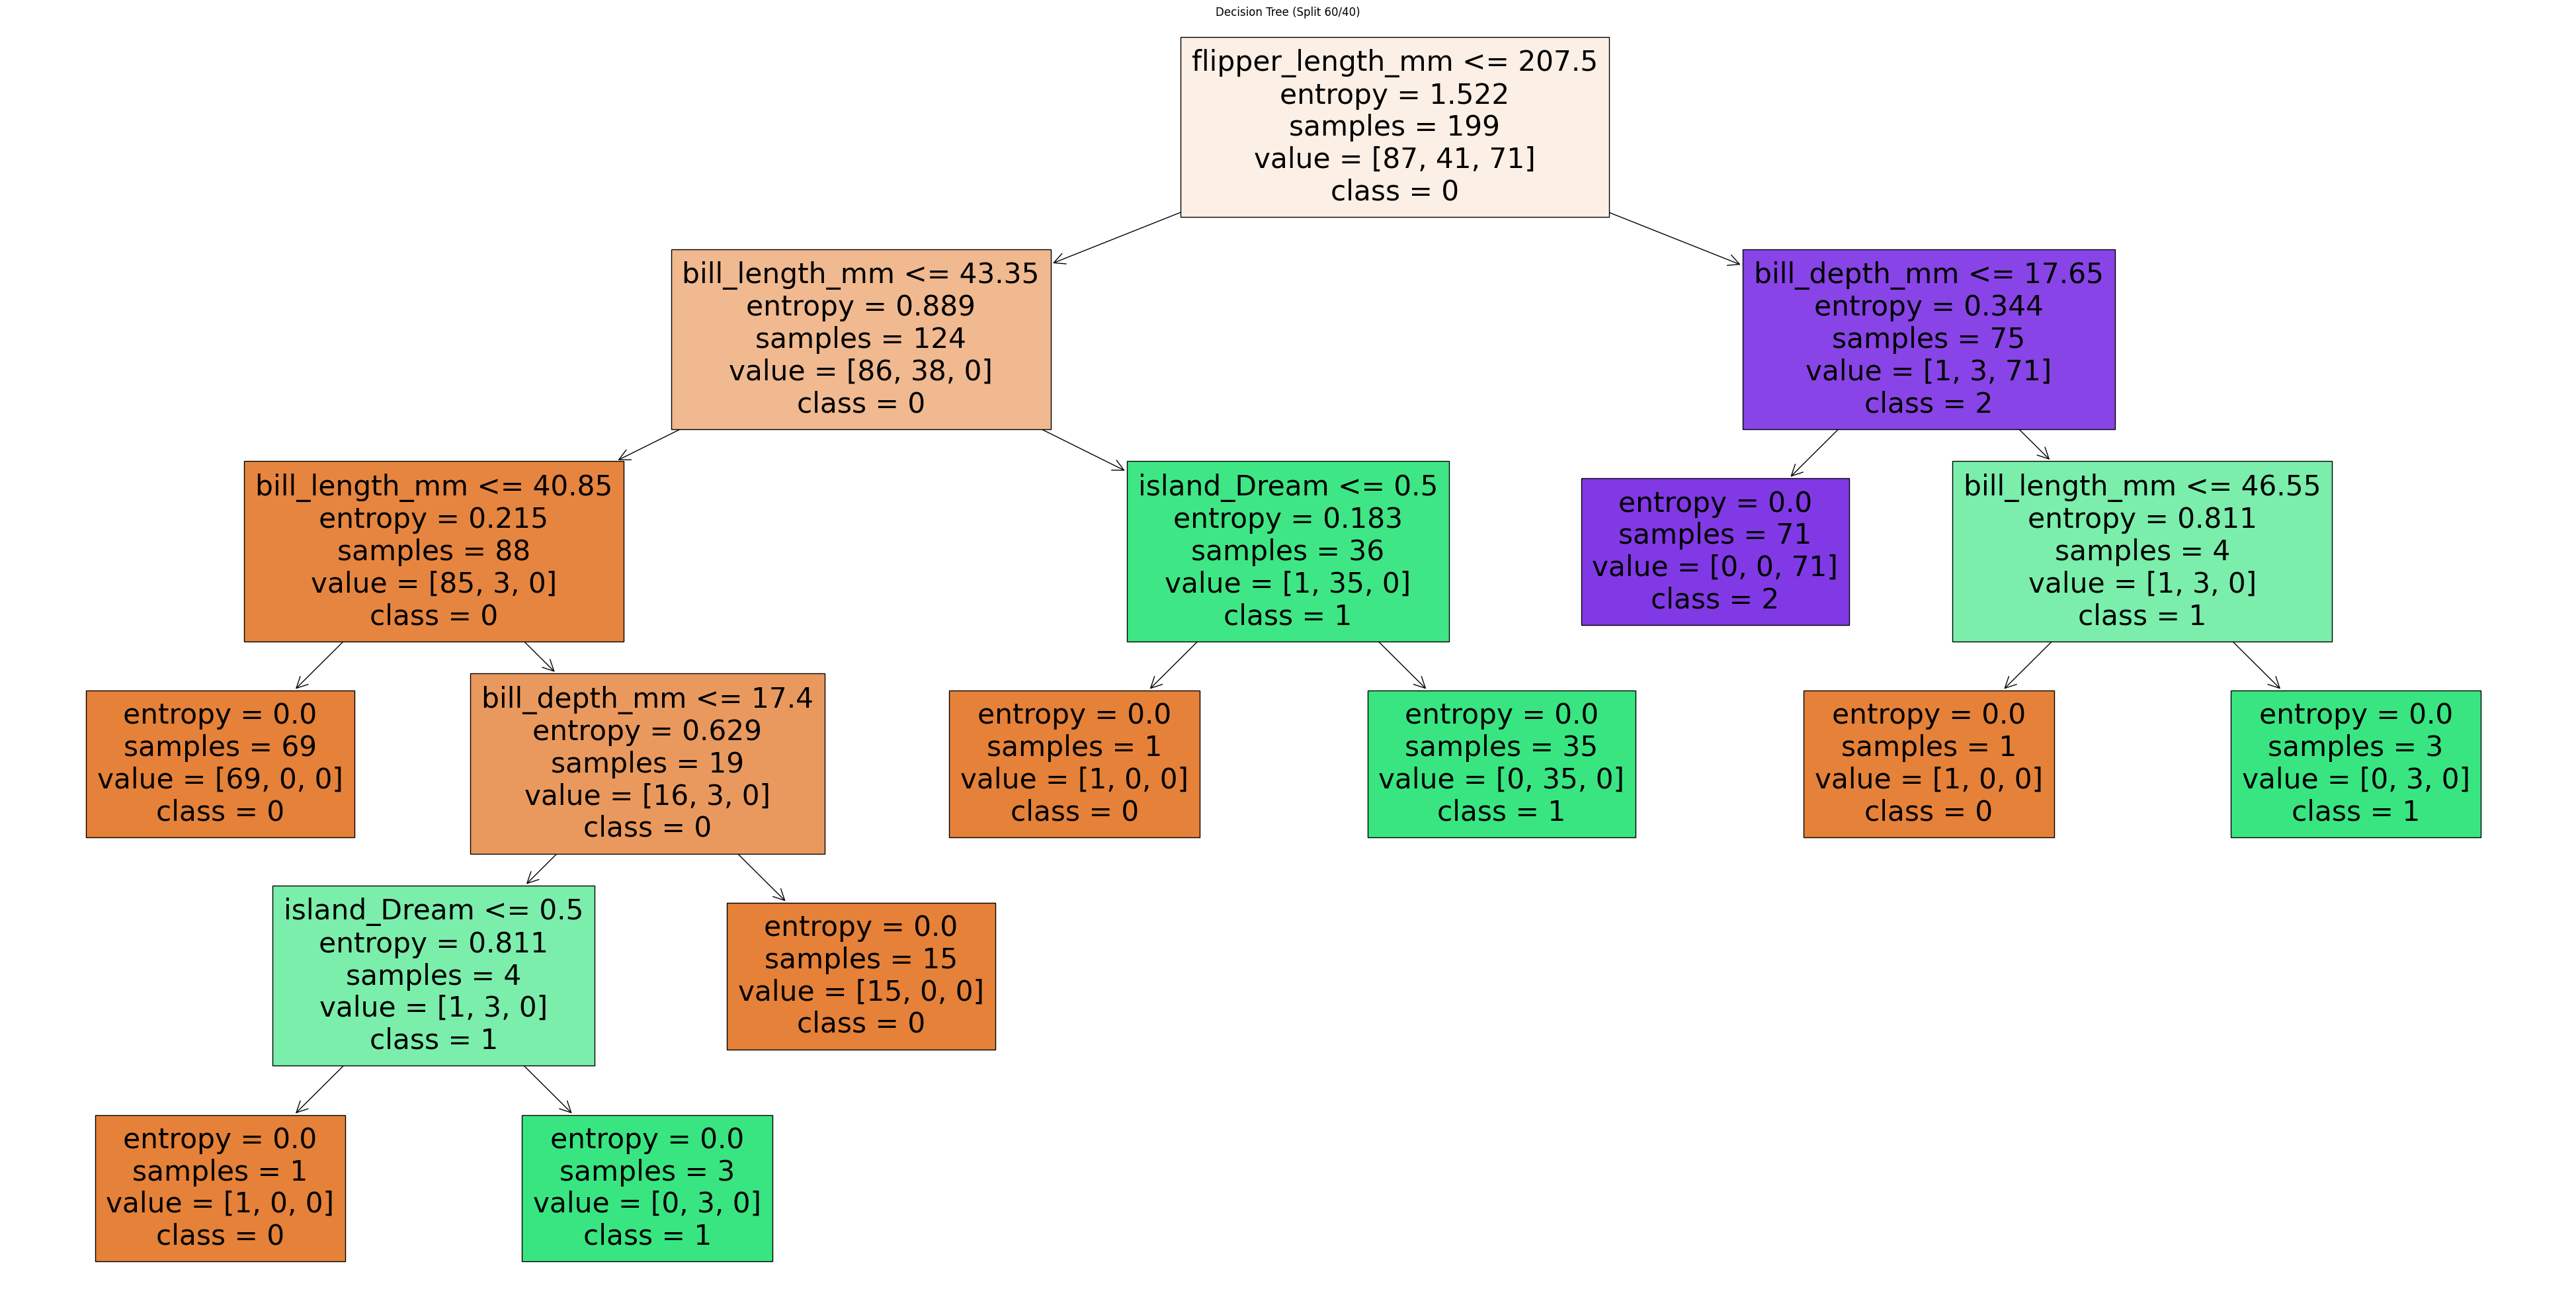

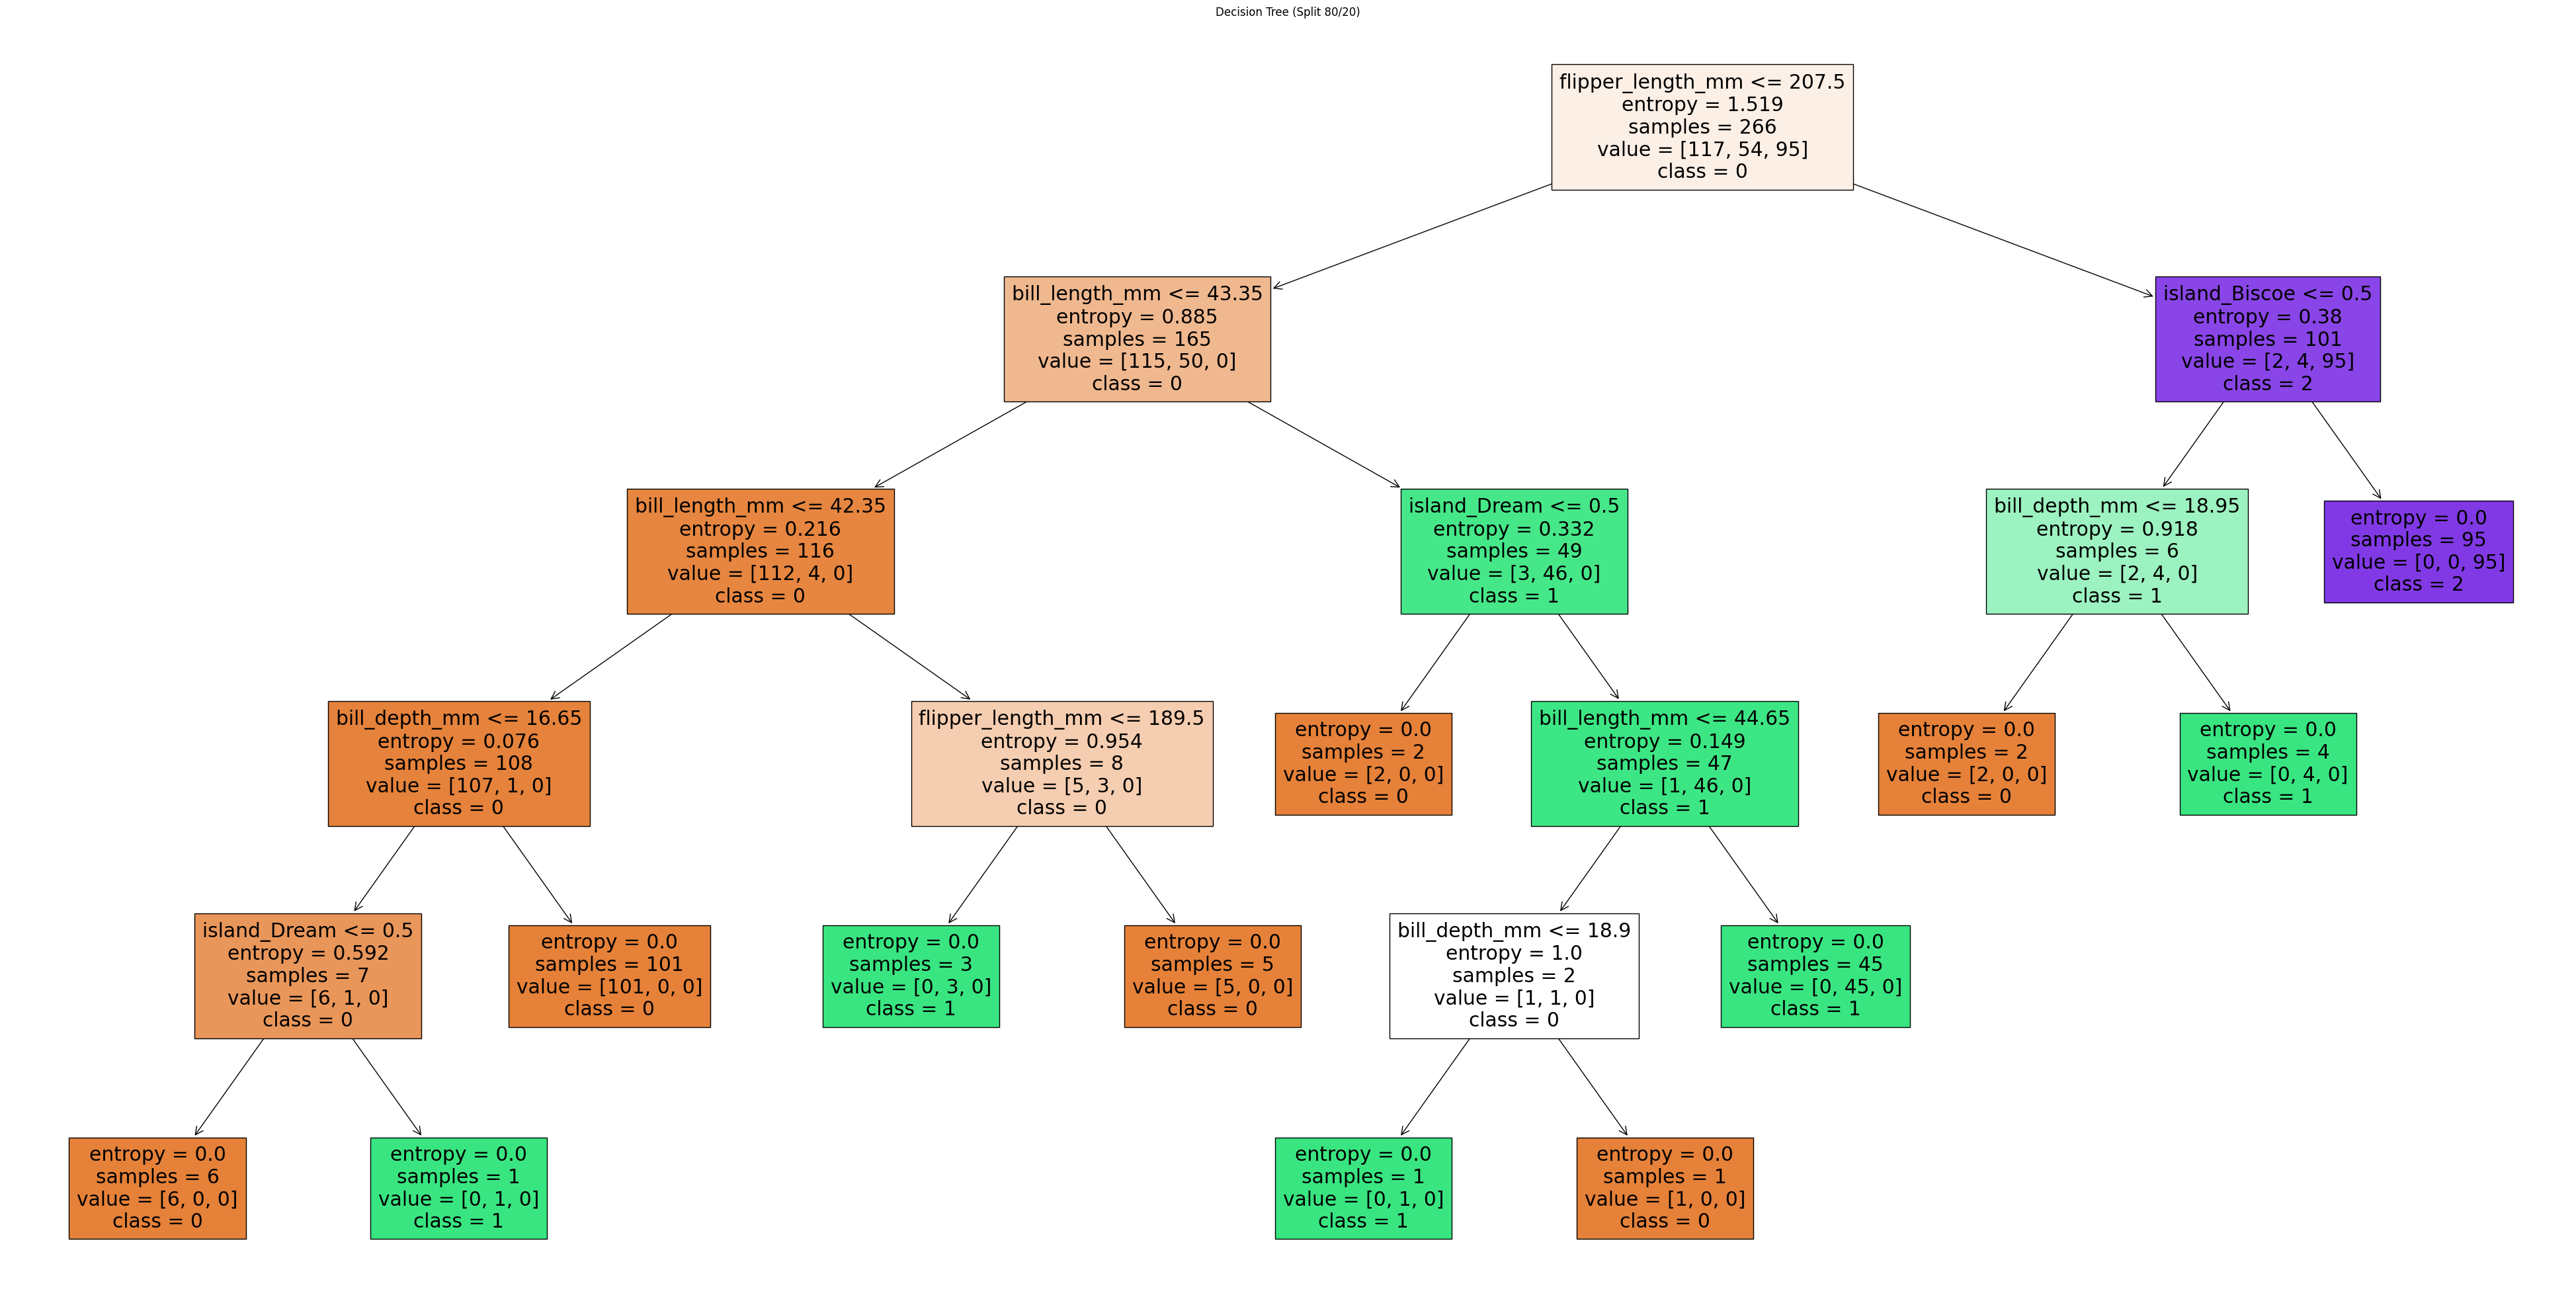

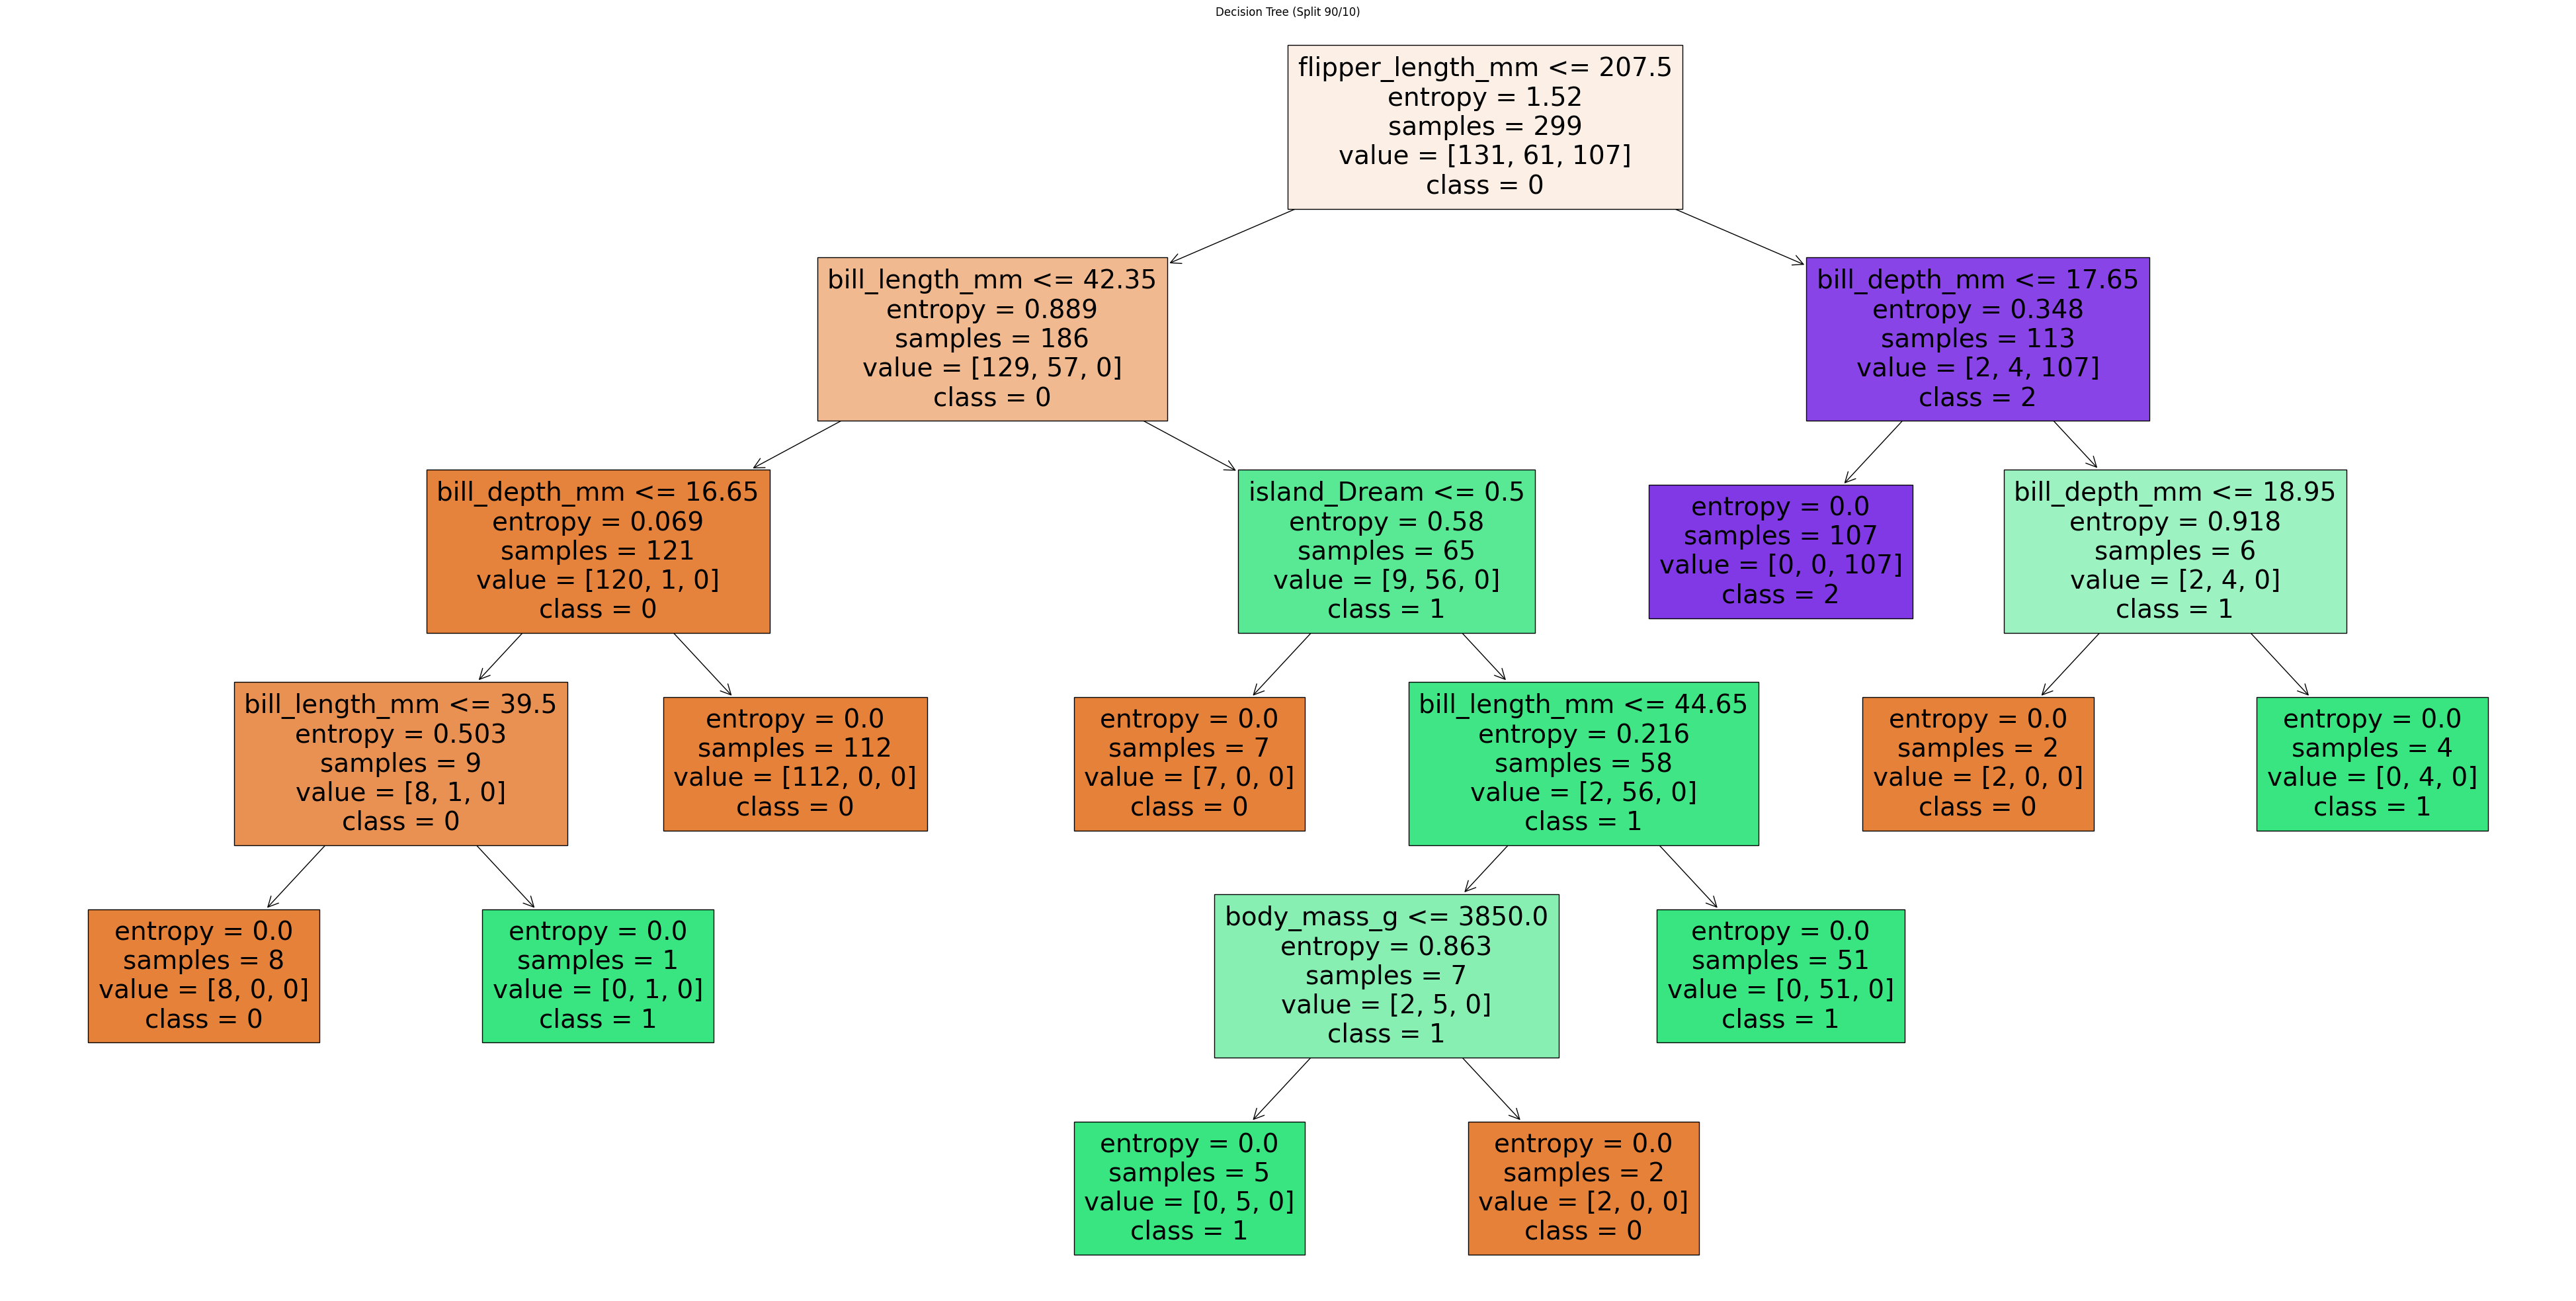

In [14]:
trees = []

for idx, (X_train, y_train, X_test, y_test) in enumerate(subsets):
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    trees.append((clf, X_train, y_train, X_test, y_test))

    # Plot tree (first none levels)
    plt.figure(figsize=(50,25))
    plot_tree(clf, feature_names=X.columns, class_names = [str(c) for c in le_species.classes_], filled=True, max_depth=None)
    plt.title(f"Decision Tree (Split {int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)})")
    plt.show()

=== Evaluation for split 40/60 ===
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        88
           1       0.91      1.00      0.95        41
           2       1.00      0.99      0.99        71

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



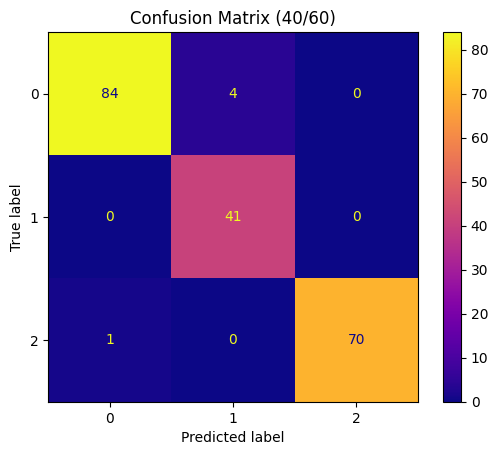

=== Evaluation for split 60/40 ===
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        59
           1       0.96      1.00      0.98        27
           2       1.00      0.96      0.98        48

    accuracy                           0.98       134
   macro avg       0.98      0.98      0.98       134
weighted avg       0.98      0.98      0.98       134



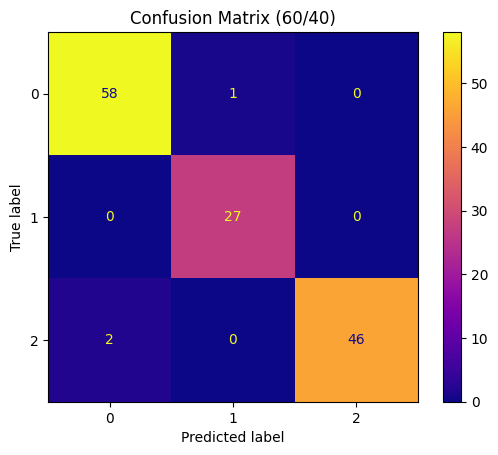

=== Evaluation for split 80/20 ===
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.82      1.00      0.90        14
           2       1.00      0.92      0.96        24

    accuracy                           0.93        67
   macro avg       0.92      0.94      0.92        67
weighted avg       0.93      0.93      0.93        67



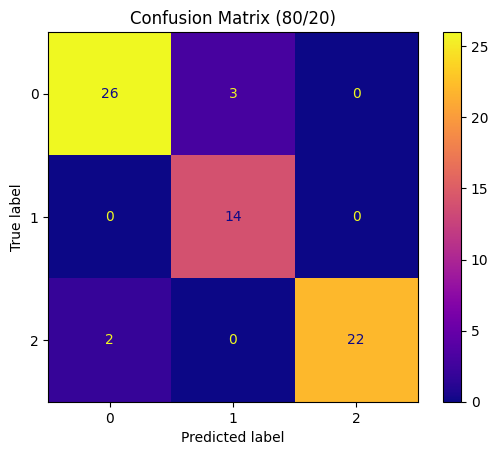

=== Evaluation for split 90/10 ===
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      1.00      1.00         7
           2       1.00      0.83      0.91        12

    accuracy                           0.94        34
   macro avg       0.96      0.94      0.95        34
weighted avg       0.95      0.94      0.94        34



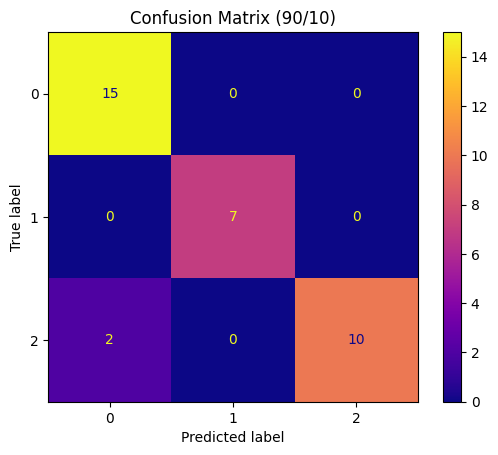

In [16]:
for idx, (clf, X_train, y_train, X_test, y_test) in enumerate(trees):
    y_pred = clf.predict(X_test)
    print(f"=== Evaluation for split {int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)} ===")
    print(classification_report(y_test, y_pred, target_names=[str(c) for c in le_species.classes_]))

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=le_species.classes_)
    disp.plot(cmap='plasma')
    plt.title(f"Confusion Matrix ({int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)})")
    plt.show()

In [17]:
X_train, y_train, X_test, y_test = subsets[2]  # 80/20 split

depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

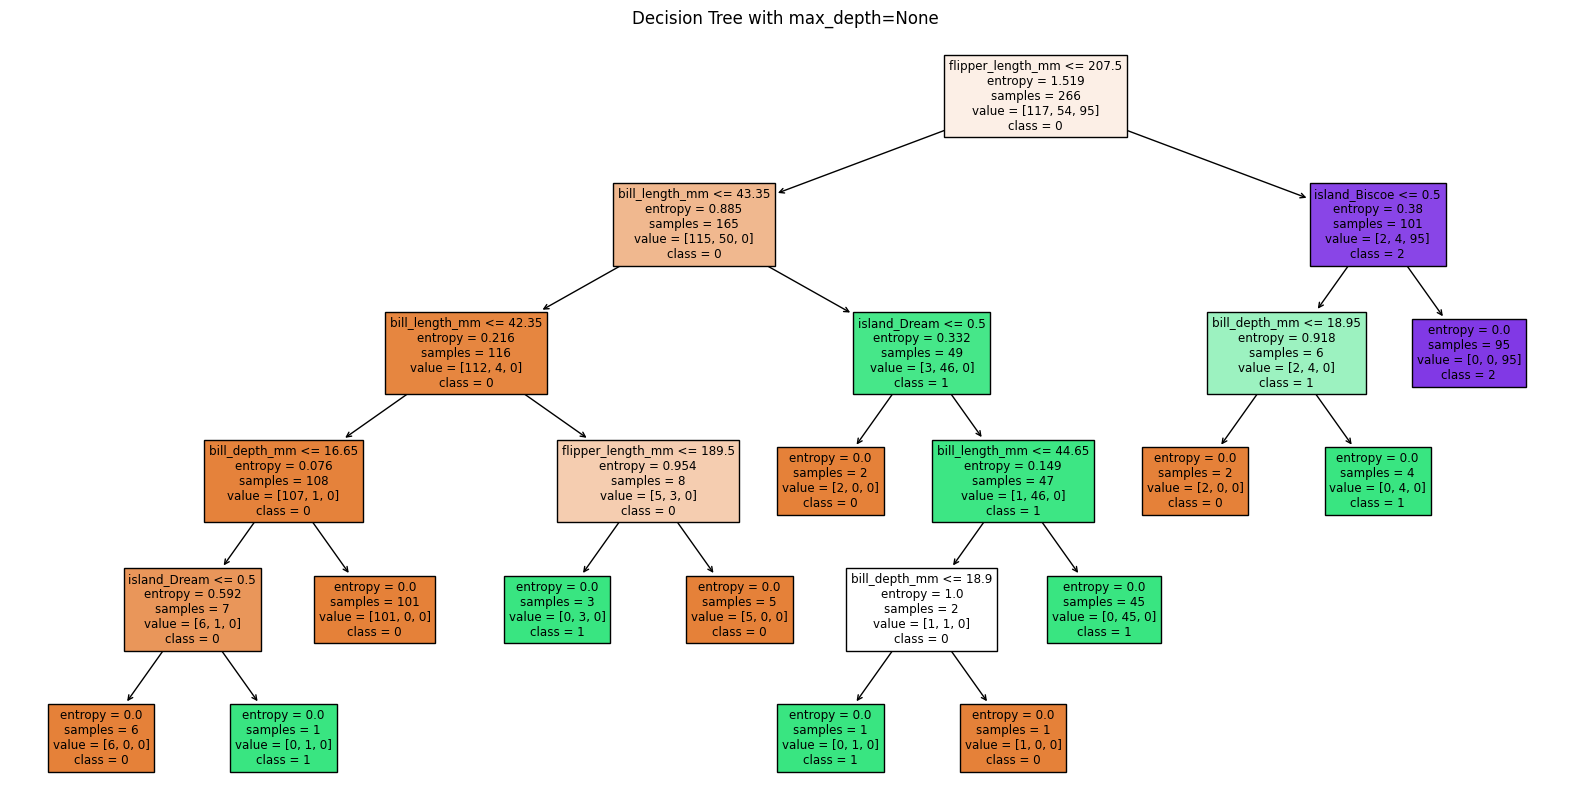

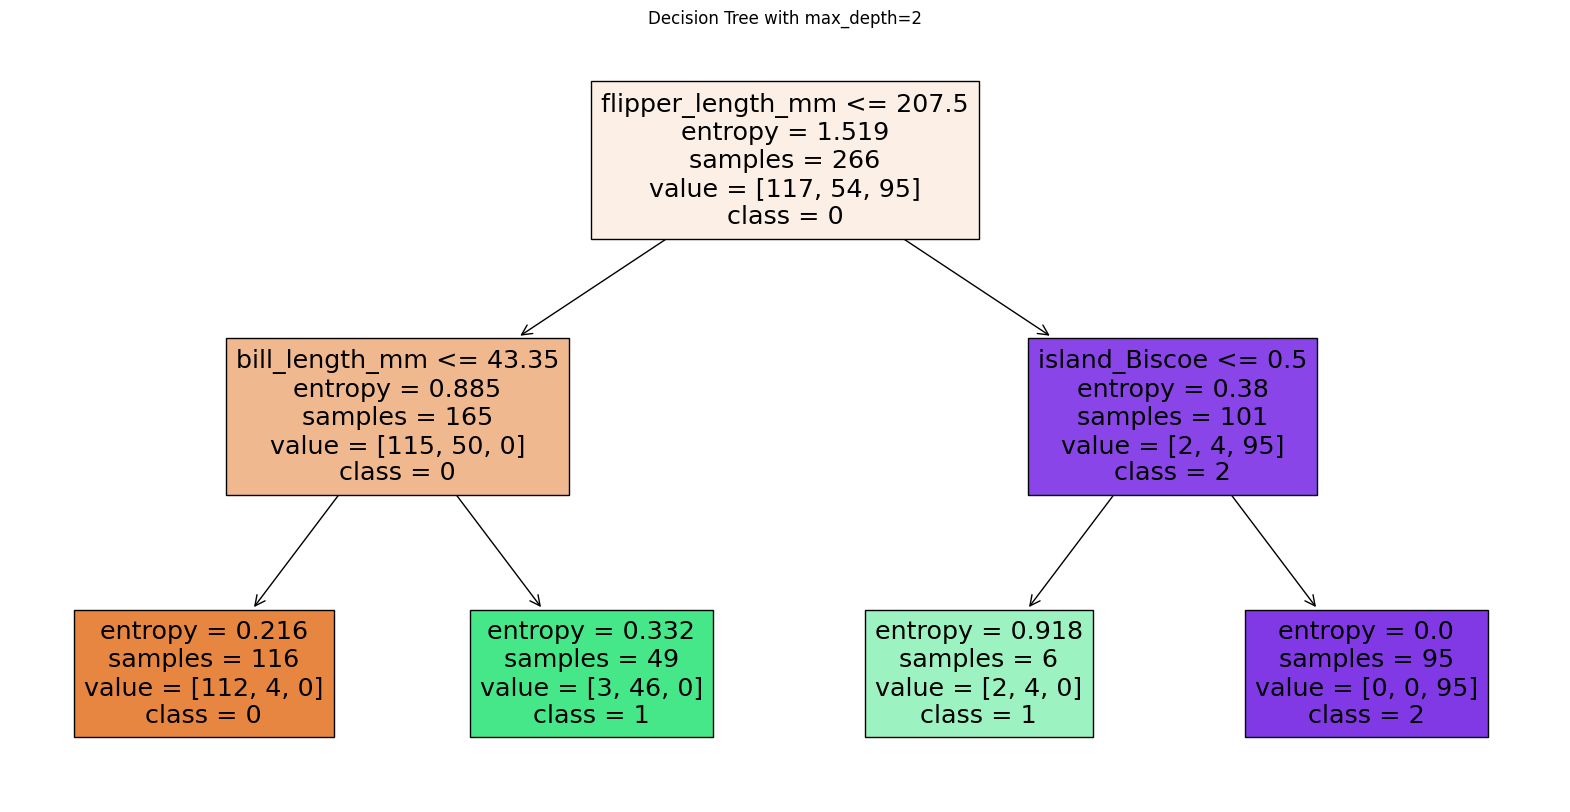

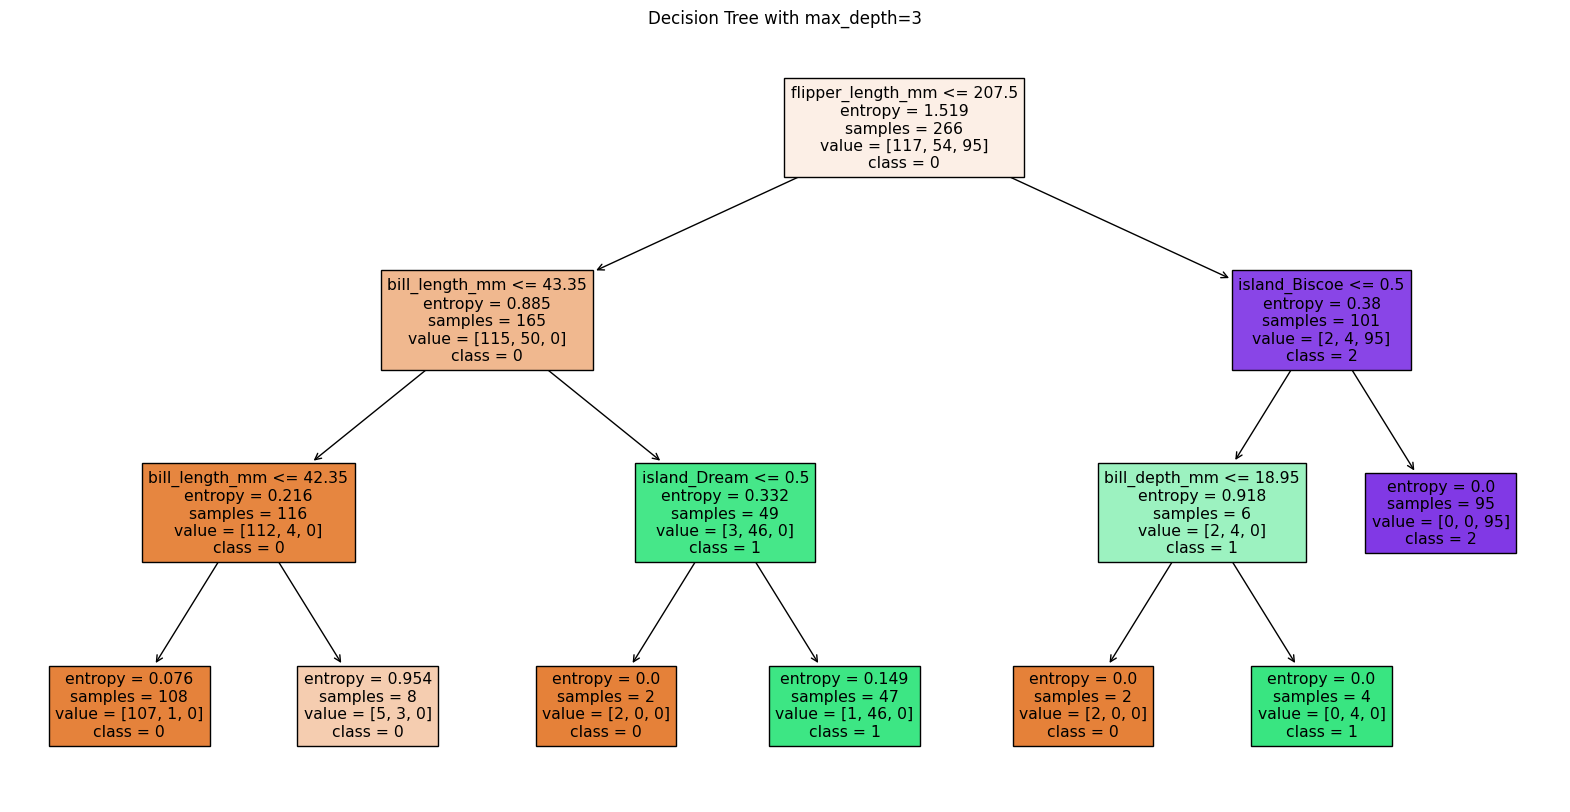

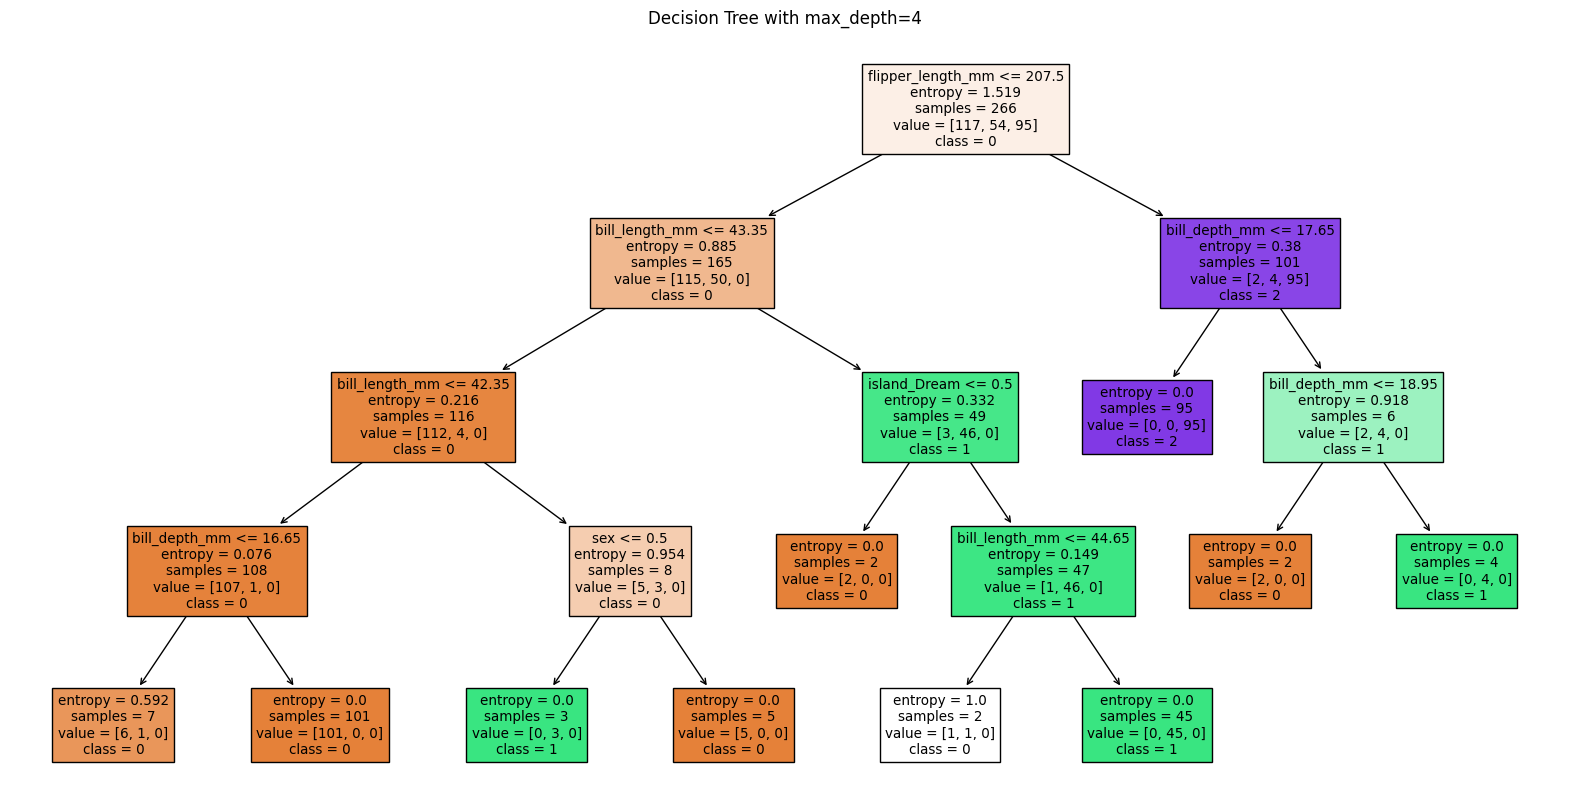

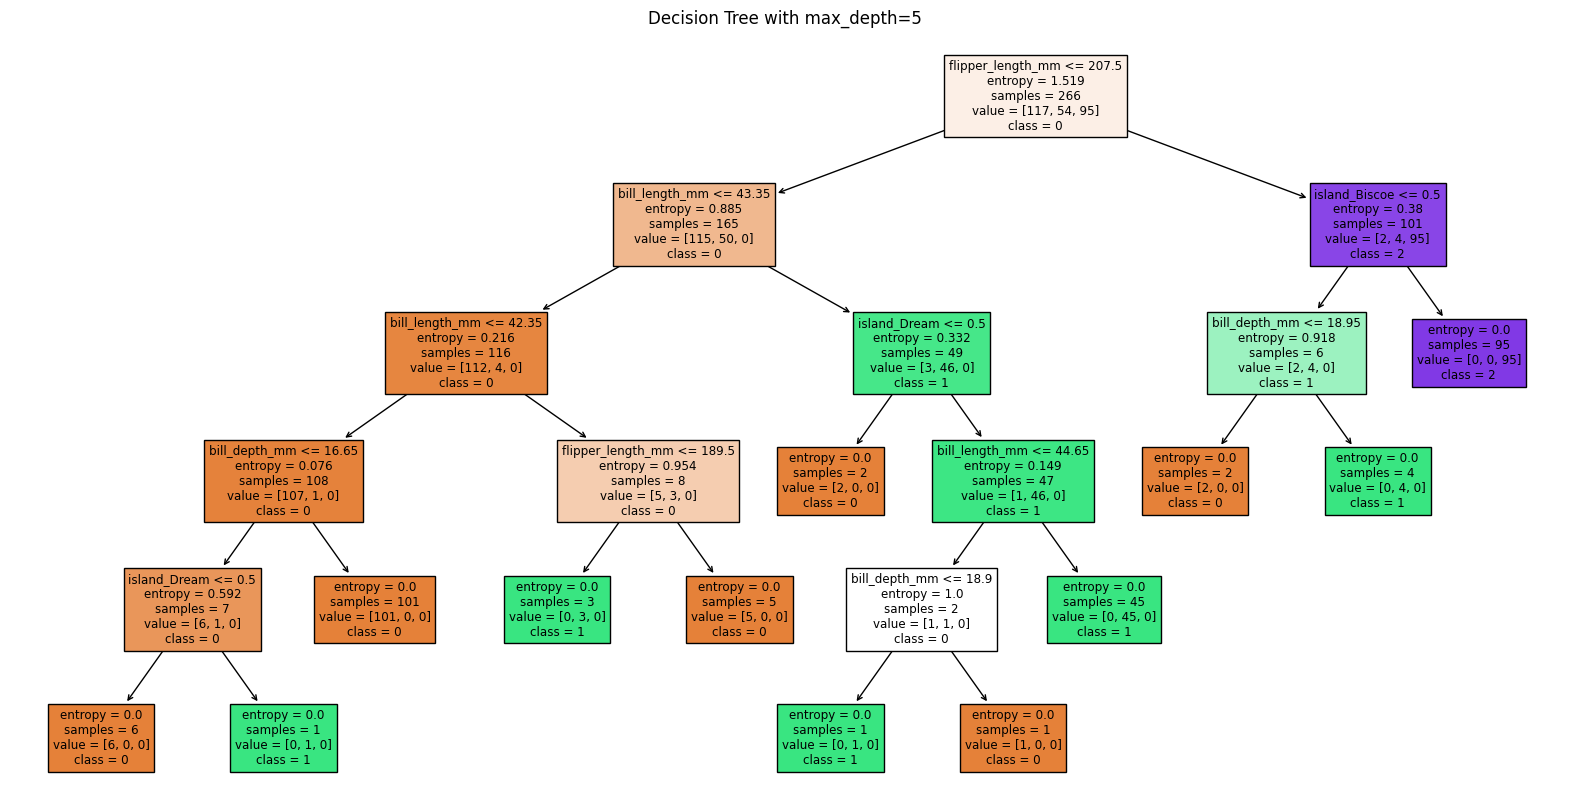

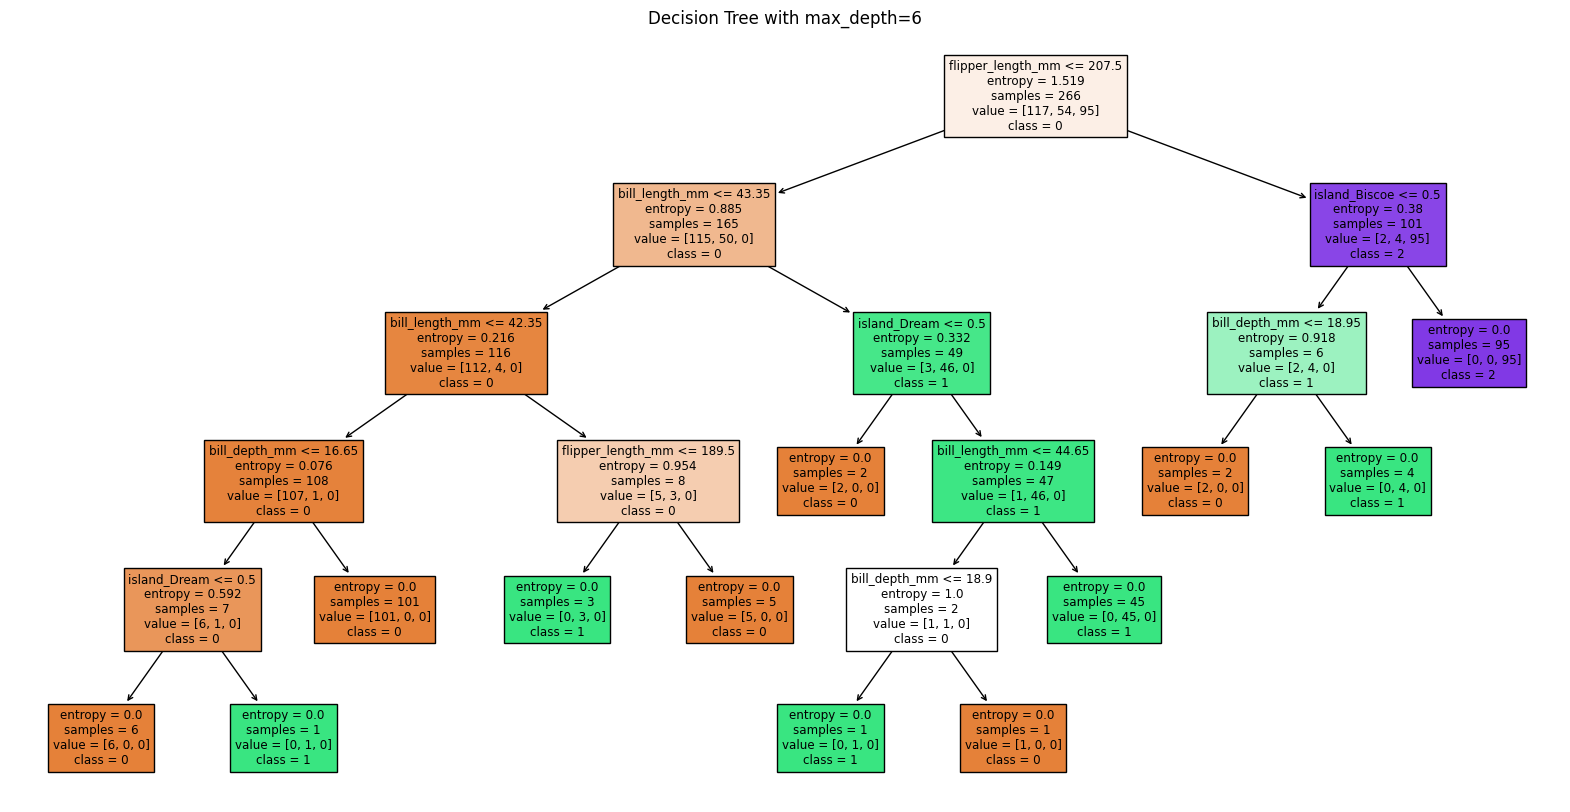

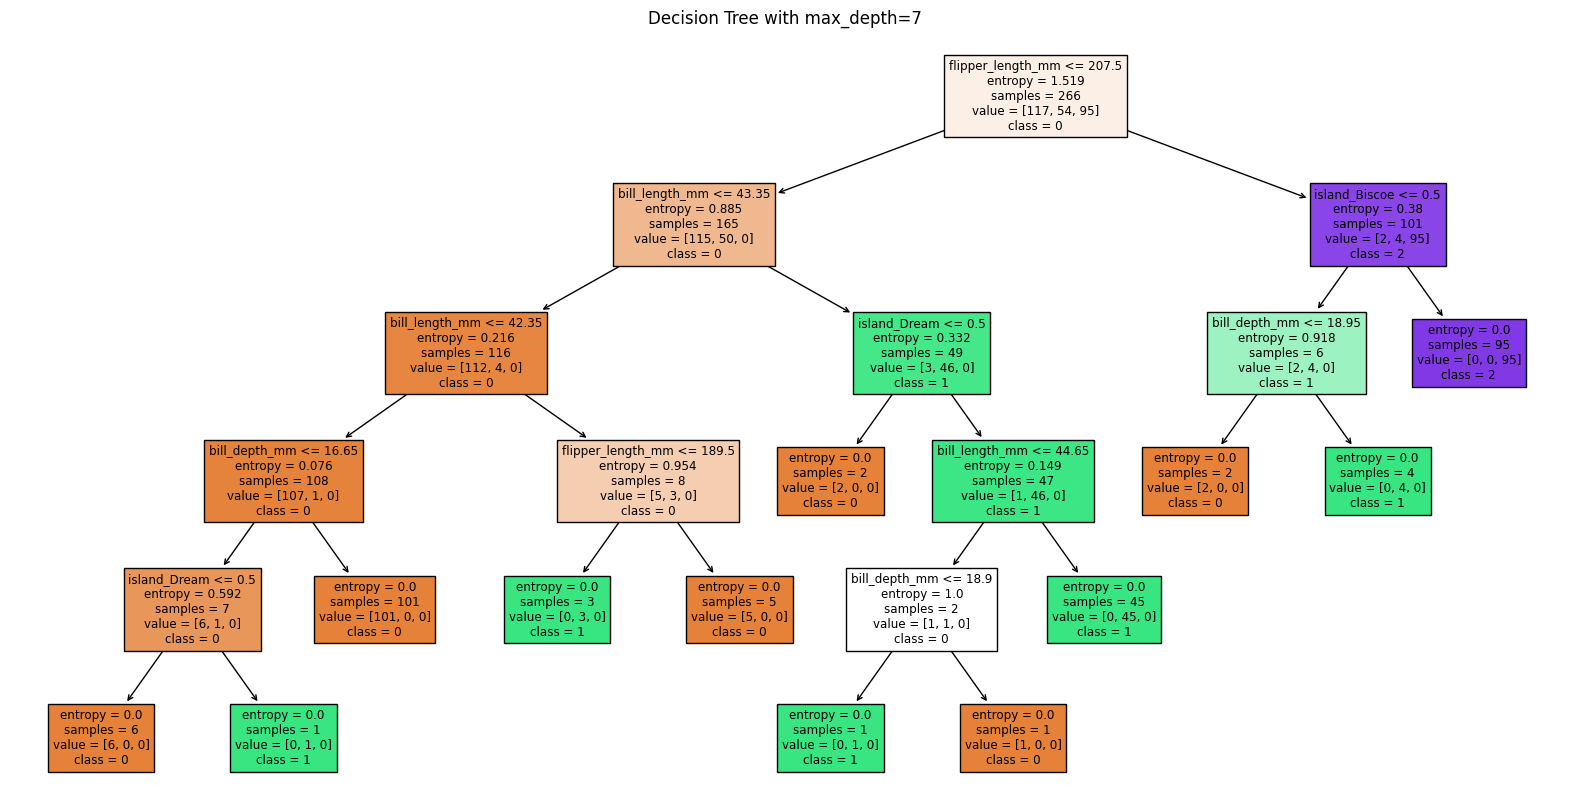

In [18]:
for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    plt.figure(figsize=(20,10))
    plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in le_species.classes_], filled=True)
    plt.title(f"Decision Tree with max_depth={depth}")
    plt.show()

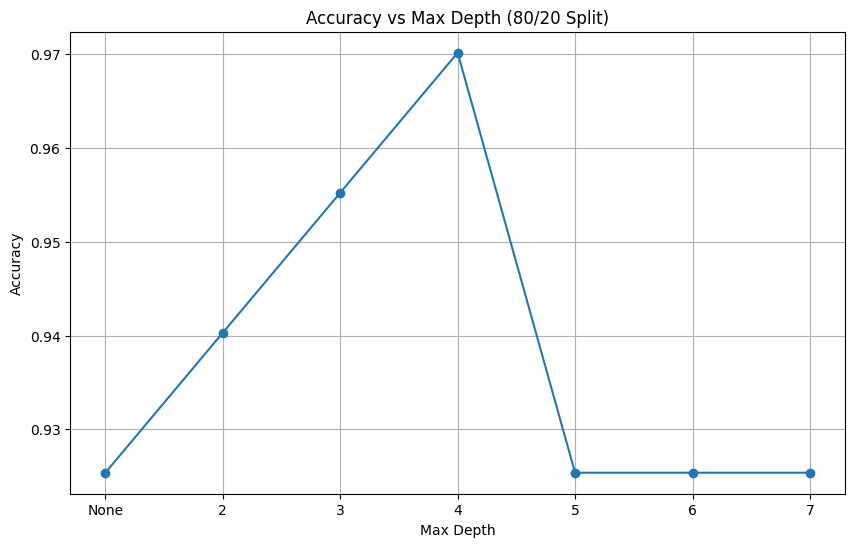

In [19]:
depths = [None, 2, 3, 4, 5, 6, 7]
depth_labels = ['None' if d is None else str(d) for d in depths]

plt.figure(figsize=(10, 6))
plt.plot(depth_labels, accuracies, marker='o')
plt.title("Accuracy vs Max Depth (80/20 Split)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
